<a href="https://colab.research.google.com/github/MatthieuBouv/IA/blob/main/Mini_Projet_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini projet 4
# Matthieu Bouvrain

Pour  ce mini projet nous allons utiliser un dataset sur le diabetes.
Dans ce dataset on va trouver de nombreuse statistique prise sur des patients et avec ces parametre on voit si le patient est atteint de diabetest ou non.

Ici on va initialiser les bibliotheques que l'on a besoins

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

import numpy as np

import pandas as pd

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn import preprocessing

import warnings

warnings.filterwarnings("ignore")


On télécharge le dataset

In [ ]:
df = pd.read_csv("diabetes_prediction_dataset.csv")

On verifie toute les colones du datasets

In [ ]:
df.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


On regarde quelle ligne vont devoir être modifier de type object à des entiers. On vois qu'il faut modifier gender et smoking_history

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


On modifie les colones, chaque nombre corrspont à une option différente

In [ ]:
df['gender'] = df['gender'].replace('Female','0')
df['gender'] = df['gender'].replace('Male','1')
df['gender'] = df['gender'].replace('Other','2')
df['smoking_history'] = df['smoking_history'].replace('never','0')
df['smoking_history'] = df['smoking_history'].replace('current','1')
df['smoking_history'] = df['smoking_history'].replace('former','2')
df['smoking_history'] = df['smoking_history'].replace('never','3')
df['smoking_history'] = df['smoking_history'].replace('ever','4')
df['smoking_history'] = df['smoking_history'].replace('not current','5')
df['smoking_history'] = df['smoking_history'].replace('No Info','6')
df['gender'] = df['gender'].astype(int)
df['smoking_history'] = df['smoking_history'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  int64  
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  int64  
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 6.9 MB


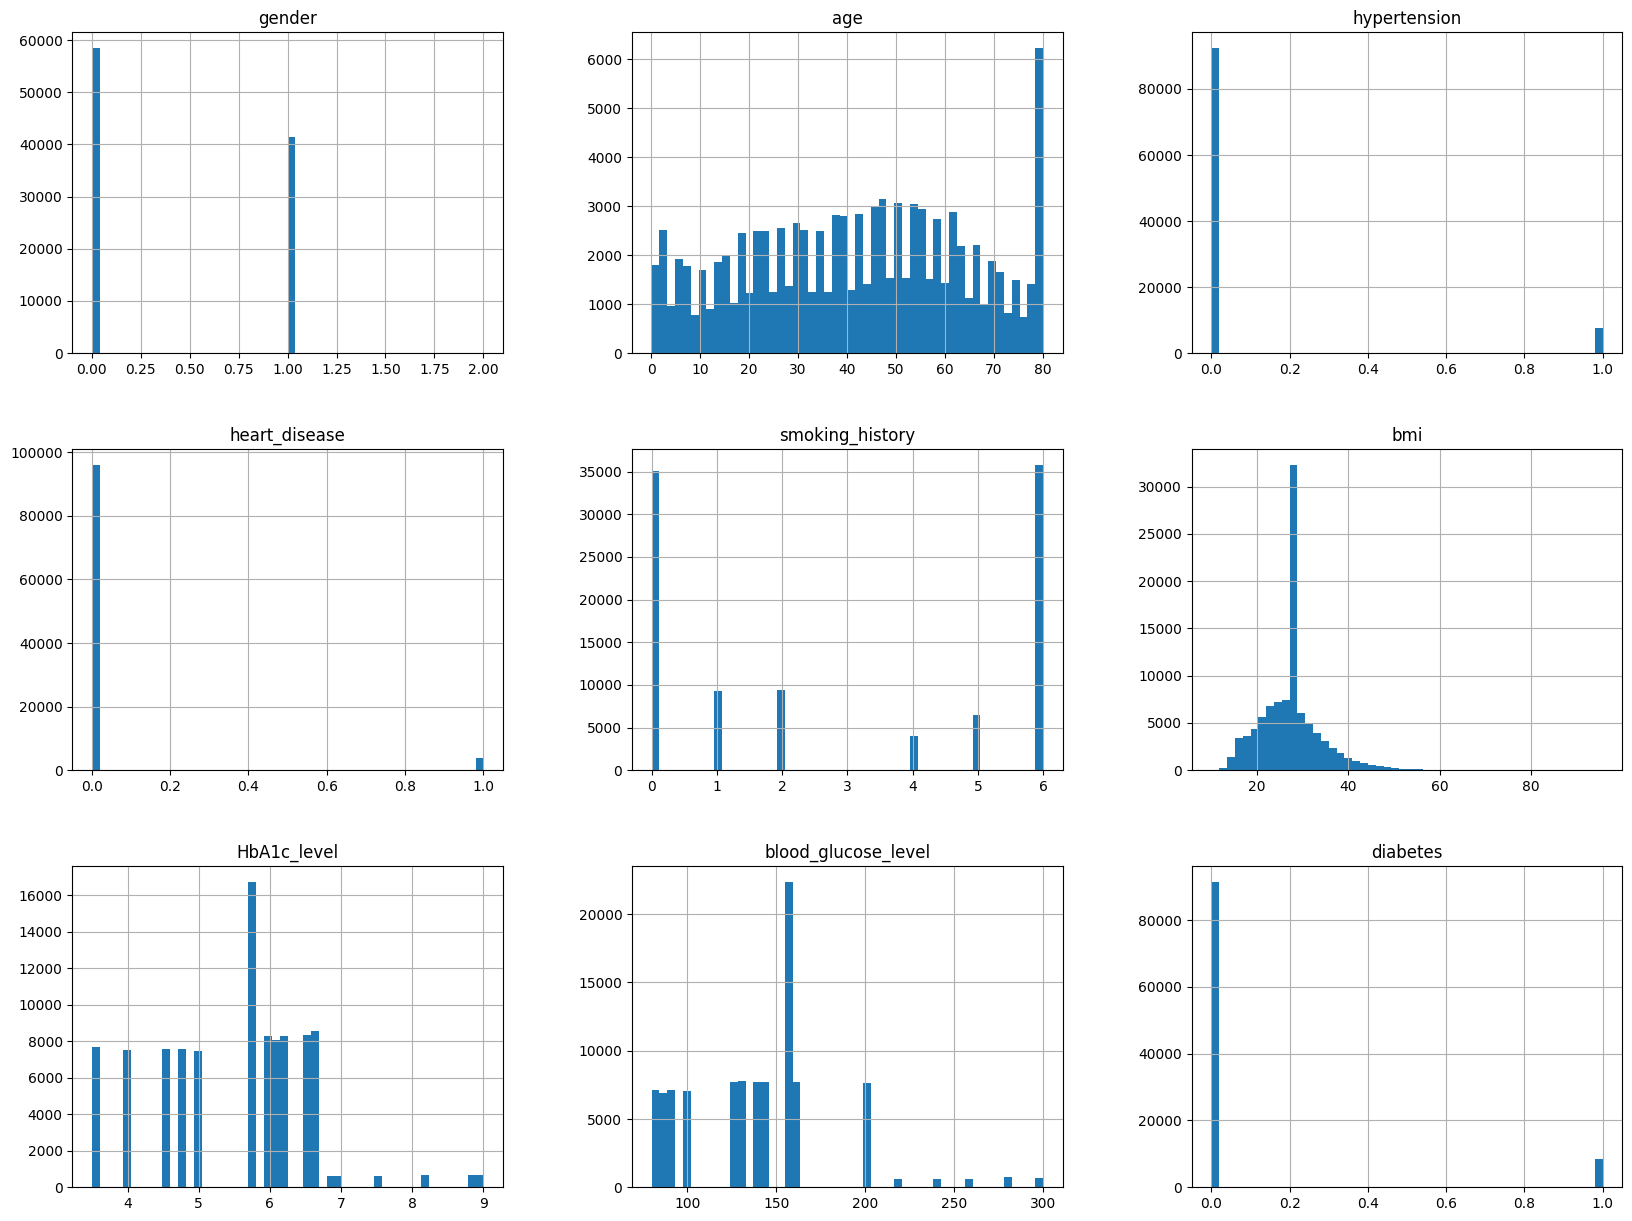

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

On sépare les données et les résultats

In [ ]:
X = df.drop('diabetes',axis=1)
y = df['diabetes']
X.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,0,80.0,0,1,0,25.19,6.6,140
1,0,54.0,0,0,6,27.32,6.6,80
2,1,28.0,0,0,0,27.32,5.7,158
3,0,36.0,0,0,1,23.45,5.0,155
4,1,76.0,1,1,1,20.14,4.8,155


In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: diabetes, dtype: int64

On va vérifier si il y a des varibles abbérante

<Axes: >

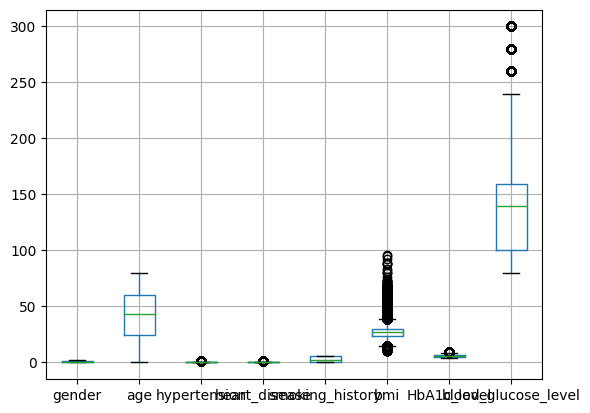

In [ ]:
X.boxplot()

On va enlever les valeurs abérrantes

In [ ]:
cols = X.columns
Q25 = X[cols].quantile(0.25) #Q1 on définit le premier quartile pour c
Q75 = X[cols].quantile(0.75)
IQR = Q75 - Q25
SeuilMin = (Q25 - 1.5 * IQR)
SeuilMax= (Q75 + 1.5 * IQR)
print(SeuilMax)
print('\n',SeuilMin)
nouv_X = X[cols].clip(SeuilMin[cols], SeuilMax[cols], axis=1)

gender                   2.500
age                    114.000
hypertension             0.000
heart_disease            0.000
smoking_history         15.000
bmi                     38.505
HbA1c_level              8.300
blood_glucose_level    247.500
dtype: float64

 gender                 -1.500
age                   -30.000
hypertension            0.000
heart_disease           0.000
smoking_history        -9.000
bmi                    14.705
HbA1c_level             2.700
blood_glucose_level    11.500
dtype: float64


Vérification :

<Axes: >

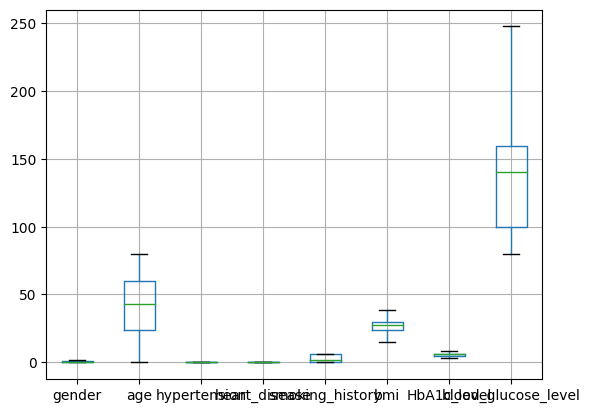

In [ ]:
nouv_X.boxplot()

On va réduire le dataset pour réduire le temp de d'entrainement et de validation, j'ai pris 10.000 options différentes

In [ ]:
from sklearn.utils import resample
X,y = resample(X,y, n_samples=10000, replace=False ,random_state=1)

On sépard pour avoir des données de train et de test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=10)

In [ ]:
#On normalise les valeurs
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Premier teste de gradien boosting

In [ ]:
gbc=GradientBoostingClassifier(n_estimators=500,learning_rate=0.05,random_state=100,max_features=5 )
gbc.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.05, max_features=5, n_estimators=500,
                           random_state=100)

In [ ]:
print("GBC accuracy is %2.2f" % accuracy_score(y_test, gbc.predict(X_test)))

GBC accuracy is 0.97


In [ ]:
from sklearn.metrics import classification_report

pred=gbc.predict(X_test)

print(classification_report(y_test, pred))


              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1824
           1       0.97      0.70      0.82       176

    accuracy                           0.97      2000
   macro avg       0.97      0.85      0.90      2000
weighted avg       0.97      0.97      0.97      2000



Test de gradien boosting avec de nombreux parametre

In [ ]:
from sklearn.model_selection import GridSearchCV

grid = {

    'learning_rate':[0.01,0.05,0.1,0.7],
    'n_estimators':np.arange(50,200,100),
    'criterion':['friedman_mse','squared_error'],
    'min_samples_split':[2,4,5]
}


gb = GradientBoostingClassifier()

gb_cv = GridSearchCV(gb, grid, cv = 5)

gb_cv.fit(X_train,y_train)

print("Best Parameters:",gb_cv.best_params_)
print("Train Score:",gb_cv.best_score_)
print("Test Score:",gb_cv.score(X_test,y_test))

Best Parameters: {'criterion': 'friedman_mse', 'learning_rate': 0.01, 'min_samples_split': 2, 'n_estimators': 150}
Train Score: 0.9728749999999999
Test Score: 0.9725


On voit les scores

In [ ]:
print("Best Parameters:",gb_cv.best_params_)
print("Train Score:",gb_cv.best_score_)
print("Test Score:",gb_cv.score(X_test,y_test))

Best Parameters: {'criterion': 'friedman_mse', 'learning_rate': 0.01, 'min_samples_split': 2, 'n_estimators': 150}
Train Score: 0.9728749999999999
Test Score: 0.9725


In [ ]:
from sklearn.metrics import classification_report
pred=gb_cv.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1824
           1       1.00      0.69      0.81       176

    accuracy                           0.97      2000
   macro avg       0.99      0.84      0.90      2000
weighted avg       0.97      0.97      0.97      2000



Ici on test avec l'un des méthodes vu en cours avec des nombreux parametre

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
parameter_space = {
    'hidden_layer_sizes': [(100), (50,30), (100,50,25),(100,75,50,25)],
    'activation': ['relu'],
    'solver': ['sgd'],
    'max_iter':[12500],
}
mlp = MLPClassifier(solver='sgd')
clf = RandomizedSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.n_outputs_=2
clf.out_activation='logistic'
clf.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=MLPClassifier(solver='sgd'), n_jobs=-1,
                   param_distributions={'activation': ['relu'],
                                        'hidden_layer_sizes': [100, (50, 30),
                                                               (100, 50, 25),
                                                               (100, 75, 50,
                                                                25)],
                                        'max_iter': [12500],
                                        'solver': ['sgd']})

In [ ]:
print("Best Parameters:",clf.best_params_)
print("Train Score:",clf.best_score_)
print("Test Score:",clf.score(X_test,y_test))

Best Parameters: {'solver': 'sgd', 'max_iter': 12500, 'hidden_layer_sizes': (100, 75, 50, 25), 'activation': 'relu'}
Train Score: 0.9612502019393112
Test Score: 0.963


In [ ]:
pred=clf.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1824
           1       0.92      0.64      0.75       176

    accuracy                           0.96      2000
   macro avg       0.94      0.82      0.87      2000
weighted avg       0.96      0.96      0.96      2000



On remarque que l'on a une légere amélioration avec gradient boosting que MLPClassifier